Setup

(-0.5, 511.5, 511.5, -0.5)

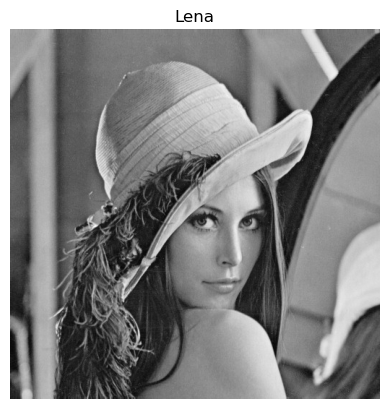

In [151]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('img/lena.jpg')
img =  cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
plt.imshow(img, cmap ='gray')
plt.title('Lena')
plt.axis('off')

Problem 1

a.)

i.)

Text(0.5, 1.0, 'Guassian Noise')

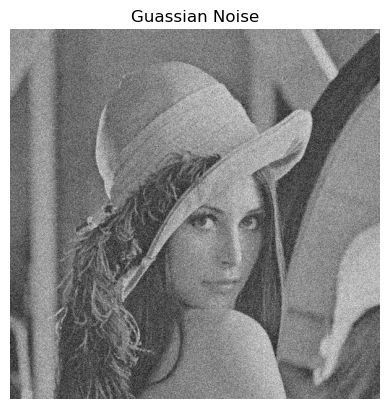

In [143]:
noise_1 = img
mean = 0
stdev = 25
gaussian = np.random.normal(mean, stdev, noise_1.shape)

noisy_image = noise_1 + gaussian

cv2.normalize(noisy_image, noisy_image, 0, 255, cv2.NORM_MINMAX, dtype=-1)
noisy_image = noisy_image.astype(np.uint8)

#cv2.imshow("Gaussian image", noisy_image)
plt.imshow(noisy_image, cmap ='gray')
plt.axis('off')
plt.title("Guassian Noise")


ii.)

Text(0.5, 1.0, 'Speckle Noise With Uniform Distribution')

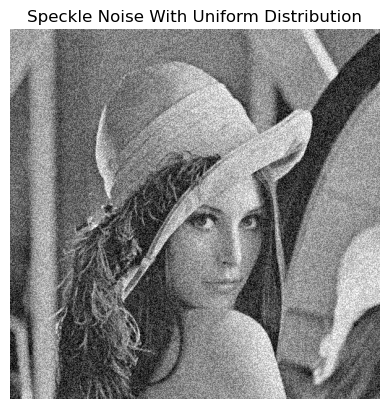

In [144]:
noise_2 = img/255
x, y = img.shape
a = -0.2
b = 0.2
n = np.zeros((x,y), dtype=np.float64)
for i in range(x):
    for j in range(y):
        n[i][j] = np.random.uniform(a,b)

noise_2 = noise_2 + n
noise_2 = np.clip(noise_2, 0, 1)

plt.imshow(noise_2, cmap = 'gray')
noise_2 = noise_2.astype('float32')
plt.axis('off')
plt.title("Speckle Noise With Uniform Distribution")




b.)

Text(0.5, 1.0, 'Median 3 x 3 blur')

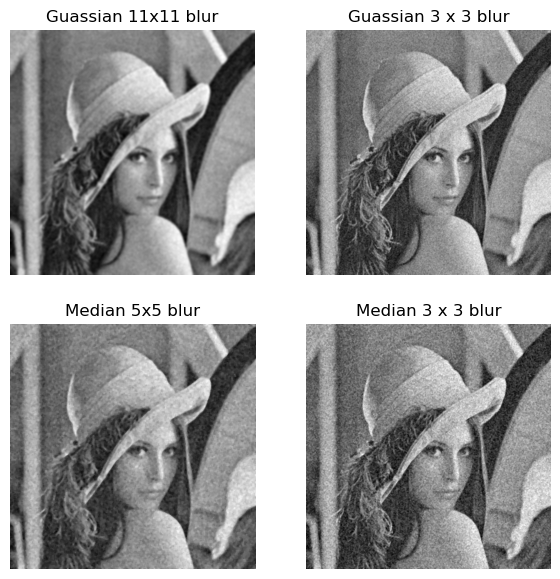

In [145]:
fig = plt.figure(figsize=(7, 7)) 



fig.add_subplot(2, 2, 1) 
gaussianEleven = cv2.GaussianBlur(noisy_image, (11,11), 0)
plt.imshow(gaussianEleven, cmap = 'gray')
plt.axis('off') 
plt.title("Guassian 11x11 blur")

fig.add_subplot(2, 2, 2) 
gaussianThree = cv2.GaussianBlur(noisy_image, (3,3), 0)
plt.imshow(gaussianThree, cmap = 'gray')
plt.axis('off') 
plt.title("Guassian 3 x 3 blur")

fig.add_subplot(2, 2, 3) 
medianFive = cv2.medianBlur(noise_2, 5)
plt.imshow(medianFive, cmap = 'gray')
plt.axis('off') 
plt.title("Median 5x5 blur")

fig.add_subplot(2, 2, 4) 
medianThree = cv2.medianBlur(noise_2, 3)
plt.imshow(medianThree, cmap = 'gray')
plt.axis('off') 
plt.title("Median 3 x 3 blur")






Using the Gaussian blur tended to preserve edges and small details better, however both demonstrated that a lower kernel size resulted in a better overall image quality. Both the gaussian and median blurs needed odd kernel sizes, however the guassian could go much high in kernel size, while median only worked up until a kernel size of 5. 

(-0.5, 511.5, 511.5, -0.5)

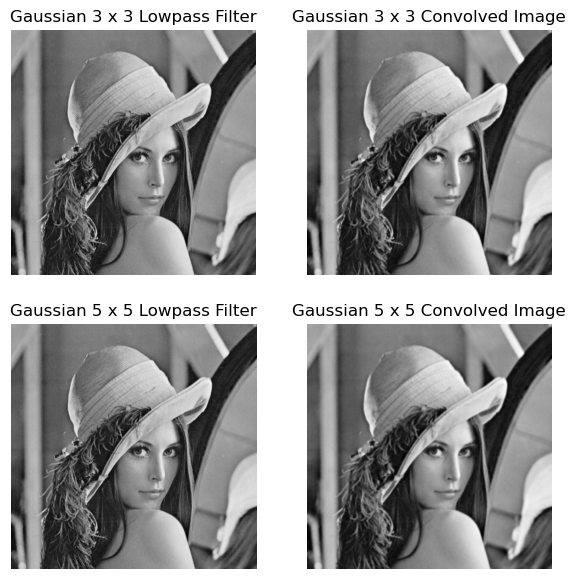

In [146]:
lowpass1 = img
lowpass2 = img

fig = plt.figure(figsize=(7, 7)) 

fig.add_subplot(2, 2, 1) 
cv2.GaussianBlur(lowpass1, (3,3), 0)
plt.imshow(lowpass1, cmap= 'gray')
plt.title("Gaussian 3 x 3 Lowpass Filter")
plt.axis('off')

gThreeMatrix = 1/16 * np.array([[1, 2, 1], 
                                [2, 4, 2], 
                                [1, 2, 1]])

fig.add_subplot(2, 2, 2) 
lowpass1 = cv2.filter2D(lowpass1, -1, gThreeMatrix) 
plt.imshow(lowpass1, cmap= 'gray')
plt.title("Gaussian 3 x 3 Convolved Image")
plt.axis('off')

fig.add_subplot(2, 2, 3) 
cv2.GaussianBlur(lowpass2, (5,5), 0)
plt.imshow(lowpass2, cmap= 'gray')
plt.title("Gaussian 5 x 5 Lowpass Filter")
plt.axis('off')

gFiveMatrix = 1/256 * np.array([[1, 4, 6, 4, 1], 
                                [4, 16, 24, 16,4], 
                                [6, 24, 36, 24, 6],
                                [4, 16, 24, 16,4],
                                [1, 4, 6, 4, 1]])

fig.add_subplot(2, 2, 4) 
lowpass2 = cv2.filter2D(lowpass2, -1, gFiveMatrix) 
plt.imshow(lowpass2, cmap= 'gray')
plt.title("Gaussian 5 x 5 Convolved Image")
plt.axis('off')

Question 2

a.)
        
i.)

(-0.5, 511.5, 511.5, -0.5)

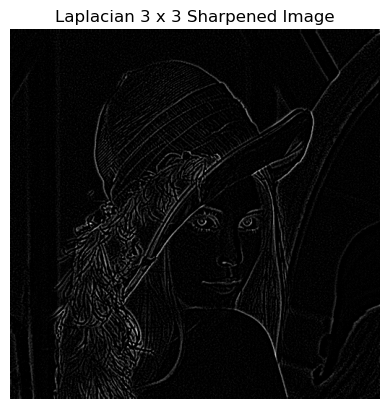

In [147]:
denoisedImg = lowpass1
laplacian = np.array([[0, 1, 0], 
                      [1, -4, 1], 
                      [0, 1, 0]])

laplacianImg = cv2.filter2D(denoisedImg, -1, laplacian)
plt.imshow(laplacianImg, cmap= 'gray')
plt.title("Laplacian 3 x 3 Sharpened Image")
plt.axis('off')

ii.)

(-0.5, 511.5, 511.5, -0.5)

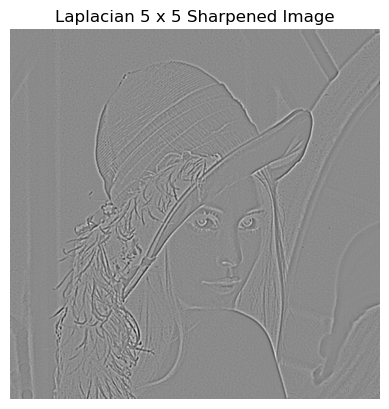

In [148]:
laplacianImg2 = cv2.Laplacian(denoisedImg, cv2.CV_64F)
plt.imshow(laplacianImg2, cmap= 'gray')
plt.title("Laplacian 5 x 5 Sharpened Image")
plt.axis('off')

A 3x3 low-pass filter will have a subtle blurring effect on the image, reducing noise and minor details while preserving most of the original content. On the other hand, a 5x5 low-pass filter will produce a more pronounced smoothing effect, significantly reducing noise and fine details, potentially making the image appear smoother.

b.)

Sobel Filter

(-0.5, 511.5, 511.5, -0.5)

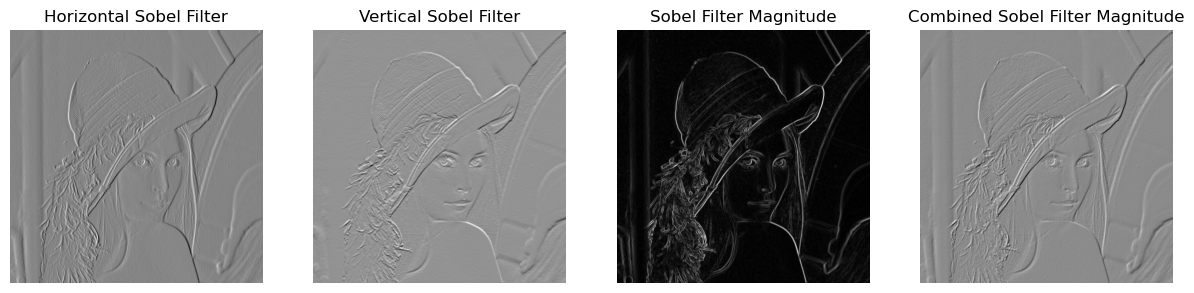

In [149]:
fig = plt.figure(figsize=(15, 15)) 

img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0) 
sobely = cv2.Sobel(img,cv2.CV_64F,0,1) 

magnitude = np.sqrt((sobelx ** 2) + (sobely ** 2))

fig.add_subplot(2, 4, 1) 
plt.imshow(sobelx, cmap = 'gray') 
plt.title("Horizontal Sobel Filter")
plt.axis('off')

fig.add_subplot(2, 4, 2)
plt.imshow(sobely, cmap = 'gray') 
plt.title("Vertical Sobel Filter")
plt.axis('off')

fig.add_subplot(2, 4, 3) 
plt.imshow(magnitude, cmap = 'gray') 
plt.title("Sobel Filter Magnitude")
plt.axis('off')

fig.add_subplot(2, 4, 4) 
plt.imshow(sobelx + sobely, cmap = 'gray') 
plt.title("Combined Sobel Filter Magnitude")
plt.axis('off')

(-0.5, 511.5, 511.5, -0.5)

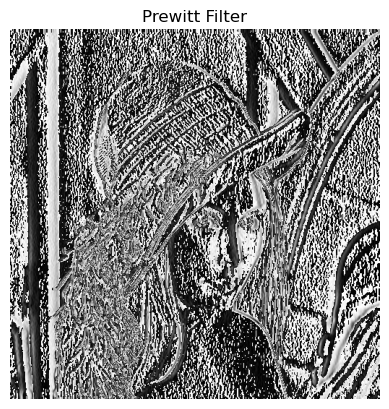

In [150]:
from scipy import ndimage
img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

prewitt = ndimage.prewitt(img)

plt.imshow(prewitt, cmap = 'gray')
plt.title("Prewitt Filter")
plt.axis('off')


The Prewitt operator, similar to the Sobel operator, serves the purpose of identifying vertical and horizontal edges within images. However, unlike the Sobel operator, it does not give special significance to pixels located nearer to the mask's center. The Prewitt filter focuses on the center of the image while the Sobel concentrates on the overall image.